In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import respy

# Input Parameters

In [4]:
rock = respy.RRock(xperm=200,poro=0.15)
fluid = respy.Fluid(visc=1.5,fvf=1.2)
well = respy.Well((4,),orate=800*1.2,skin=0,radius=0.25)

# Analytical Solution

In [5]:
transient = respy.radial.Transient(area=40,height=30,rrock=rock,fluid=fluid,well=well,pinit=4500,tcomp=25e-6)
pseudo = respy.radial.Pseudo('square',area=40,height=30,rrock=rock,fluid=fluid,well=well,pinit=4500,tcomp=25e-6)

In [6]:
times = np.logspace(-5,1.5)

In [7]:
pss = pseudo.solve(times,well.radius)

In [8]:
trs = transient.solve(times,well.radius)

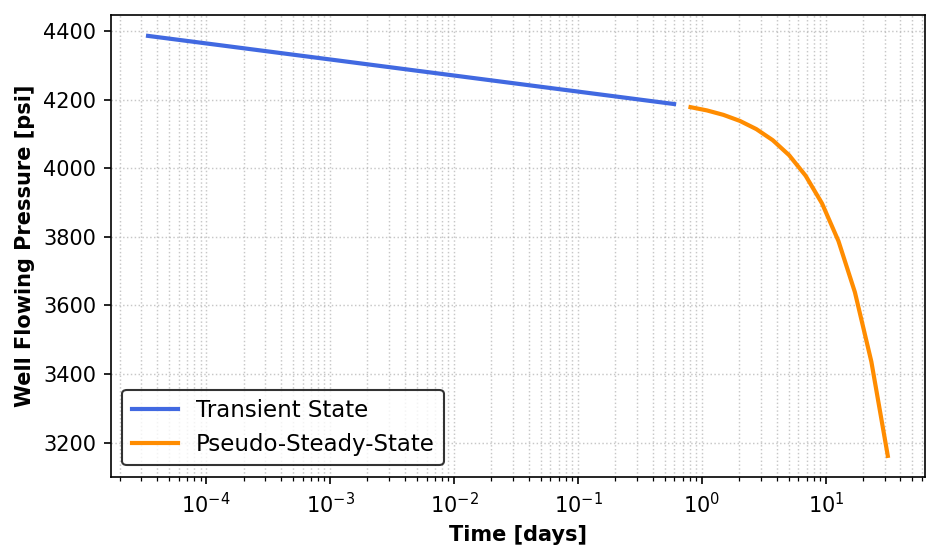

In [9]:
# Plot with improved aesthetics
plt.figure(figsize=(7,4), dpi=150)  # Increase figure size and resolution

plt.semilogx(trs.times.flatten(), trs.press.flatten(), label="Transient State", 
             linestyle='-', linewidth=2, color='royalblue')

plt.semilogx(pss.times.flatten(), pss.press.flatten(), label="Pseudo-Steady-State", 
             linestyle='-', linewidth=2, color='darkorange')

# Labels and title
plt.xlabel("Time [days]", fontweight='bold')
plt.ylabel("Well Flowing Pressure [psi]", fontweight='bold')

# Grid and legend
plt.grid(True, which="both", linestyle=":", linewidth=0.7, alpha=0.7)
plt.legend(fontsize=11, loc="best", frameon=True, edgecolor='black')

# Show the plot
plt.show()

# Numerical Solver

In [10]:
dx = np.sqrt(pseudo._area)/0.3048/3
dy = np.sqrt(pseudo._area)/0.3048/3

In [11]:
rock = respy.RRock(xperm=(200,)*9,poro=(0.15,)*9)
well = respy.Well((4,),orate=-800*1.2,skin=0,radius=0.25)

In [12]:
delta = respy.GridDelta(xdelta=(dx,)*3,ydelta=(dy,)*3,zdelta=pseudo.height)

In [13]:
grids = delta.grids

In [14]:
solver = respy.BaseSolver(grids,rock,fluid,tcomp=25e-6)

In [15]:
steps = times[1:]-times[:-1]

In [16]:
time = respy.Time(steps)

In [17]:
press = np.full(9,4500)*6894.76

well_pressure = np.zeros_like(time.steps)

for index,(tcurr,tstep) in enumerate(time):
    vec = solver.vector(tstep=tstep,wells=(well,))
    mat = solver.matrix(vec)
    well_pressure[index] = press[4]+mat._Q.data.tolist()[0]/vec._W[0]._prod[0]
    press = solver.method.implicit(mat,press.reshape((-1,1)))

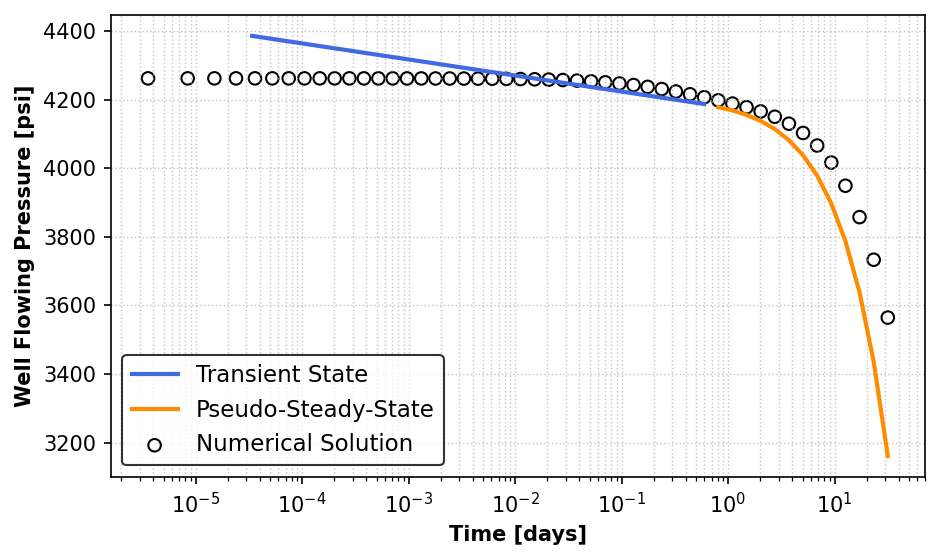

In [18]:
plt.figure(figsize=(7,4), dpi=150)  # Increase figure size and resolution

plt.semilogx(trs.times.flatten(), trs.press.flatten(), label="Transient State", 
             linestyle='-', linewidth=2, color='royalblue')

plt.semilogx(pss.times.flatten(), pss.press.flatten(), label="Pseudo-Steady-State", 
             linestyle='-', linewidth=2, color='darkorange')

plt.scatter(time.times[1:],well_pressure/6894.76,label="Numerical Solution",facecolors='none', edgecolors='black')

# Labels and title
plt.xlabel("Time [days]", fontweight='bold')
plt.ylabel("Well Flowing Pressure [psi]", fontweight='bold')

# Grid and legend
plt.grid(True, which="both", linestyle=":", linewidth=0.7, alpha=0.7)
plt.legend(fontsize=11, loc="best", frameon=True, edgecolor='black')

# Show the plot
plt.show()

## Decreasing Grid Size

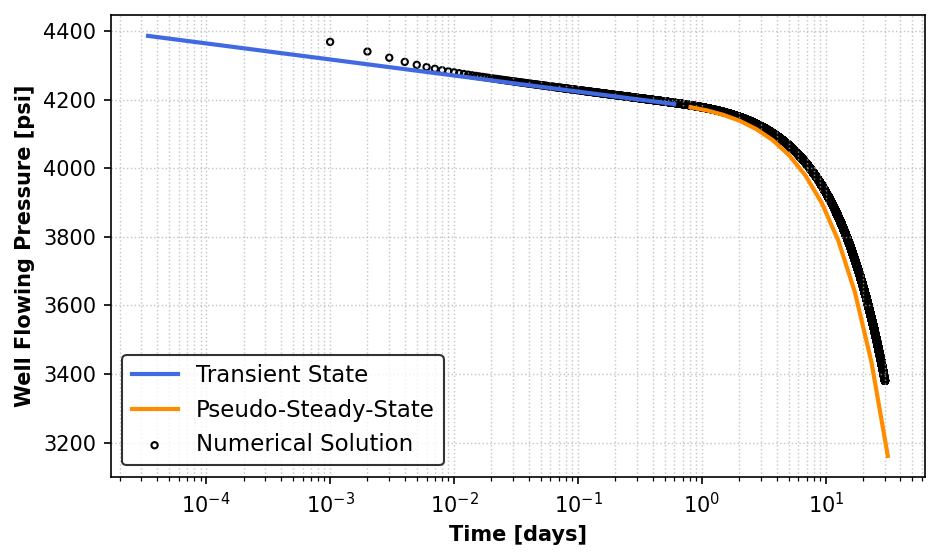

In [27]:
N = 21

dx = np.sqrt(pseudo._area)/0.3048/N
dy = np.sqrt(pseudo._area)/0.3048/N

windex = int((N**2-1)/2)

rock = respy.RRock(xperm=(200,)*N**2,poro=(0.15,)*N**2)
well = respy.Well((windex,),orate=-800*1.2,skin=0,radius=0.25)

delta = respy.GridDelta(xdelta=(dx,)*N,ydelta=(dy,)*N,zdelta=pseudo.height)

grids = delta.grids

solver = respy.BaseSolver(grids,rock,fluid,tcomp=25e-6)

# steps = times[1:]-times[:-1]
steps = np.full(3000,0.001)

time = respy.Time(steps)

press = np.full(N**2,4500)*6894.76

well_pressure = np.zeros_like(time.steps)

for index,(tcurr,tstep) in enumerate(time):
    vec = solver.vector(tstep=tstep,wells=(well,))
    mat = solver.matrix(vec)
    well_pressure[index] = press[windex]+mat._Q.data.tolist()[0]/vec._W[0]._prod[0]
    press = solver.method.implicit(mat,press.reshape((-1,1)))

# Plot with improved aesthetics
plt.figure(figsize=(7,4), dpi=150)  # Increase figure size and resolution

plt.semilogx(trs.times.flatten(), trs.press.flatten(), label="Transient State", 
             linestyle='-', linewidth=2, color='royalblue')

plt.semilogx(pss.times.flatten(), pss.press.flatten(), label="Pseudo-Steady-State", 
             linestyle='-', linewidth=2, color='darkorange')

plt.scatter(time.times[1:],well_pressure/6894.76,label="Numerical Solution",marker='.',facecolors='none', edgecolors='black')

# Labels and title
plt.xlabel("Time [days]", fontweight='bold')
plt.ylabel("Well Flowing Pressure [psi]", fontweight='bold')

# Grid and legend
plt.grid(True, which="both", linestyle=":", linewidth=0.7, alpha=0.7)
plt.legend(fontsize=11, loc="best", frameon=True, edgecolor='black')

# Show the plot
plt.show()